In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('Pizza_Sale.csv')
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [5]:
df['total_price'].fillna(df['unit_price']*df['quantity'],inplace=True)

In [11]:
category_mapping = df[['pizza_name_id', 'pizza_category']].dropna().drop_duplicates()
category_mapping = category_mapping.set_index('pizza_name_id')['pizza_category'].to_dict()

df['pizza_category'] = df['pizza_category'].fillna(df['pizza_name_id'].map(category_mapping))

In [12]:
ingredients_list = df[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_list = df.set_index('pizza_name')['pizza_ingredients'].to_dict()

df['pizza_ingredients'] =df['pizza_ingredients'].fillna(df['pizza_name'].map(ingredients_list))

In [13]:
name_id_mapping = df[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
name_id_mapping = name_id_mapping.set_index('pizza_name')['pizza_name_id'].to_dict()

df['pizza_name_id'] = df['pizza_name_id'].fillna(df['pizza_name'].map(name_id_mapping))

In [14]:
df.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           7
dtype: int64

In [6]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [15]:
def fill_pizza_name_based_on_ingredients(row, df):
    if pd.isna(row['pizza_name']):  # Check if pizza_name is NaN
        ingredients_set = set(row['pizza_ingredients'])  # Convert ingredients list to set for comparison
        
        # Search for a non-null pizza_name in the DataFrame that matches the ingredients
        matching_row = df[df['pizza_name'].notna() & df['pizza_ingredients'].apply(lambda x: set(x) == ingredients_set)]
        
        # If a match is found, return the pizza name, else return None
        if not matching_row.empty:
            return matching_row['pizza_name'].iloc[0]
    return row['pizza_name']  # Return the original pizza_name if it's not NaN

# Apply the function to fill missing pizza names
df['pizza_name'] = df.apply(lambda row: fill_pizza_name_based_on_ingredients(row, df), axis=1)

# Display the updated DataFrame

In [10]:
col1, col2 = "unit_price", "quantity"
corr = df[col1].corr(df[col2])
print ("Correlation between ", col1, " and ", col2, "is: ", 
round(corr, 2))


Correlation between  unit_price  and  quantity is:  0.01


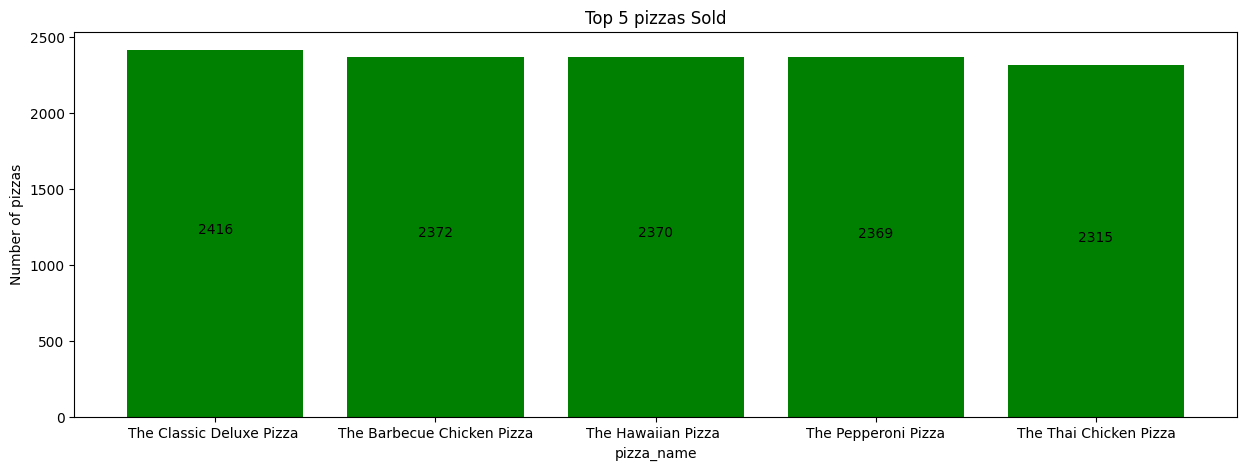

In [16]:
import matplotlib.pyplot as plt
 
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')
        
X=['The Classic Deluxe Pizza ','The Barbecue Chicken Pizza','The Hawaiian Pizza ','The Pepperoni Pizza','The Thai Chicken Pizza']
y=[2416,2372,2370,2369,2315]

# setting figure size by using figure() function 
plt.figure(figsize = (15,5))
     
    # making the bar chart on the data
plt.bar(X, y,color='Green')
     
    # calling the function to add value labels
addlabels(X, y)
     
    # giving title to the plot
plt.title("Top 5 pizzas Sold")
     
    # giving X and Y labels
plt.xlabel("pizza_name")
plt.ylabel("Number of pizzas")
     
    # visualizing the plot
plt.show()

Text(0.5, 1.0, 'Pizza size Distribution')

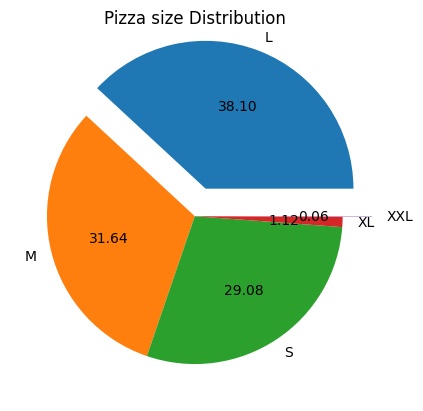

In [17]:
df.groupby('pizza_size').size().plot(kind='pie', autopct='%.2f',explode=[0.2, 0, 0, 0,0.2])
plt.title('Pizza size Distribution')

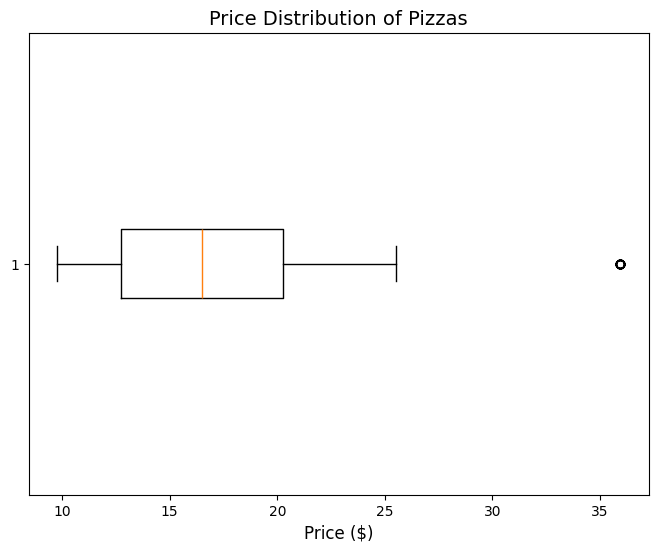

In [18]:
# Plotting the box plot for price distribution
plt.figure(figsize=(8,6))
plt.boxplot(df['unit_price'], vert=False)

# Adding titles and labels
plt.title('Price Distribution of Pizzas', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)

# Show the plot
plt.show()

In [19]:
df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1-1-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1-1-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1-1-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1-1-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1-1-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [20]:
df1=pd.read_excel('Pizza_ingredients.xlsx')
df1

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0
...,...,...,...,...
513,veggie_veg_s,The Vegetables + Vegetables Pizza,Green Peppers,20.0
514,veggie_veg_s,The Vegetables + Vegetables Pizza,Red Onions,20.0
515,veggie_veg_s,The Vegetables + Vegetables Pizza,Zucchini,10.0
516,veggie_veg_s,The Vegetables + Vegetables Pizza,Spinach,15.0


In [21]:
df1['pizza_ingredients'].value_counts()

pizza_ingredients
Garlic                57
Tomatoes              56
Red Onions            41
Red Peppers           30
Spinach               24
                      ..
Chorizo Sausage        1
Prosciutto             1
Caramelized Onions     1
Romano Cheese          1
Blue Cheese            1
Name: count, Length: 64, dtype: int64

In [22]:
# Exploding the ingredients and their corresponding quantities
exploded_df = df1.explode(['pizza_ingredients', 'Items_Qty_In_Grams'])

# Grouping by ingredient and summing the quantities
ingredient_summary = exploded_df.groupby('pizza_ingredients')['Items_Qty_In_Grams'].sum().reset_index()

# Sorting the ingredients by quantity in descending order
ingredient_summary_sorted = ingredient_summary.sort_values(by='Items_Qty_In_Grams', ascending=False)

# The ingredient with the highest quantity
most_used_ingredient = ingredient_summary_sorted.head(5)

print(most_used_ingredient)


   pizza_ingredients  Items_Qty_In_Grams
51        Red Onions              1740.0
15           Chicken              1500.0
13         Capocollo              1200.0
62          Tomatoes              1170.0
37         Mushrooms               840.0


In [23]:
mean_value=df1['Items_Qty_In_Grams'].mean()
df1['Items_Qty_In_Grams'].fillna(mean_value,inplace=True)

In [16]:
df['order_time']=pd.to_datetime(df['order_time'],format='mixed')
df['order_date']=pd.to_datetime(df['order_date'],format='mixed')

df["Day"]=df["order_date"].dt.day
df["Month"]=df["order_date"].dt.month
df["Year"]=df["order_date"].dt.year
df["Hour"]=df["order_time"].dt.hour
df["Time"]=df["order_time"].dt.time

In [25]:
import pandas as pd
import datetime


# Function to get day of the week from day number and year
def get_day_of_week(day_number, year):
    # Create a date using the year and day number
    date = datetime.date(year, 1, 1) + datetime.timedelta(days=day_number - 1)
    # Get the day of the week as a string (e.g., "Monday", "Tuesday", etc.)
    return date.strftime("%A")

# Apply the function to create a new column 'day_of_week'
df['day_of_week'] = df.apply(lambda row: get_day_of_week(row['Day'], row['Year']), axis=1)

# Display the updated DataFrame
print(df)


       pizza_id  order_id  pizza_name_id  quantity order_date  \
0             1         1     hawaiian_m         1 2015-01-01   
1             2         2  classic_dlx_m         1 2015-01-01   
2             3         2  five_cheese_l         1 2015-01-01   
3             4         2    ital_supr_l         1 2015-01-01   
4             5         2     mexicana_m         1 2015-01-01   
...         ...       ...            ...       ...        ...   
48615     48616     21348  ckn_alfredo_m         1 2015-12-31   
48616     48617     21348  four_cheese_l         1 2015-12-31   
48617     48618     21348   napolitana_s         1 2015-12-31   
48618     48619     21349     mexicana_l         1 2015-12-31   
48619     48620     21350      bbq_ckn_s         1 2015-12-31   

               order_time  unit_price  total_price pizza_size pizza_category  \
0     2024-12-12 11:38:36       13.25        13.25          M        Classic   
1     2024-12-12 11:57:40       16.00        16.00         

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  datetime64[ns]
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  Day                48620 non-null  int32         
 13  Month              48620 non-null  int32         
 14  Year  

In [27]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [29]:
# importing holidays module
import holidays
# getting India holidays
india_holidays = holidays.India(years=2015)
# iterating over the holidays
for date, occasion in india_holidays.items():
   # printing date and occasion
   print(f'{date} - {occasion}')
df['holiday'] = df['order_date'].apply(lambda x: 1 if x in india_holidays or x.weekday()==6 else 0)

2015-01-14 - Makar Sankranti / Pongal
2015-01-26 - Republic Day
2015-08-15 - Independence Day
2015-10-02 - Gandhi Jayanti
2015-05-01 - Labour Day
2015-11-11 - Diwali
2015-03-06 - Holi
2015-10-23 - Day of Ashura (estimated)
2015-01-03 - Mawlid (estimated)
2015-12-23 - Mawlid (estimated)
2015-07-17 - Eid ul-Fitr (estimated)
2015-07-18 - Eid ul-Fitr (estimated)
2015-09-23 - Eid al-Adha (estimated)
2015-09-24 - Eid al-Adha (estimated)
2015-03-29 - Palm Sunday
2015-04-03 - Good Friday
2015-04-05 - Easter Sunday
2015-05-24 - Feast of Pentecost
2015-12-25 - Christmas Day


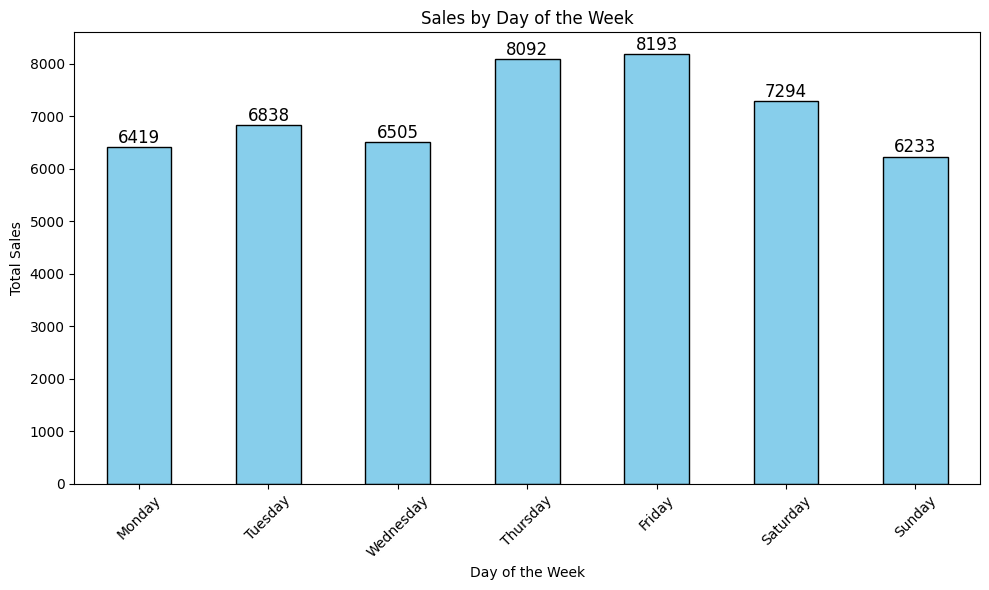

In [30]:
import pandas as pd
import matplotlib.pyplot as plt



sales_by_day = df.groupby('day_of_week')['quantity'].sum()

# Sort the days of the week for consistent order (from Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day[ordered_days]

# Plotting the sales against days of the week
plt.figure(figsize=(10, 6))
ax=sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
for i, v in enumerate(sales_by_day):
  ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

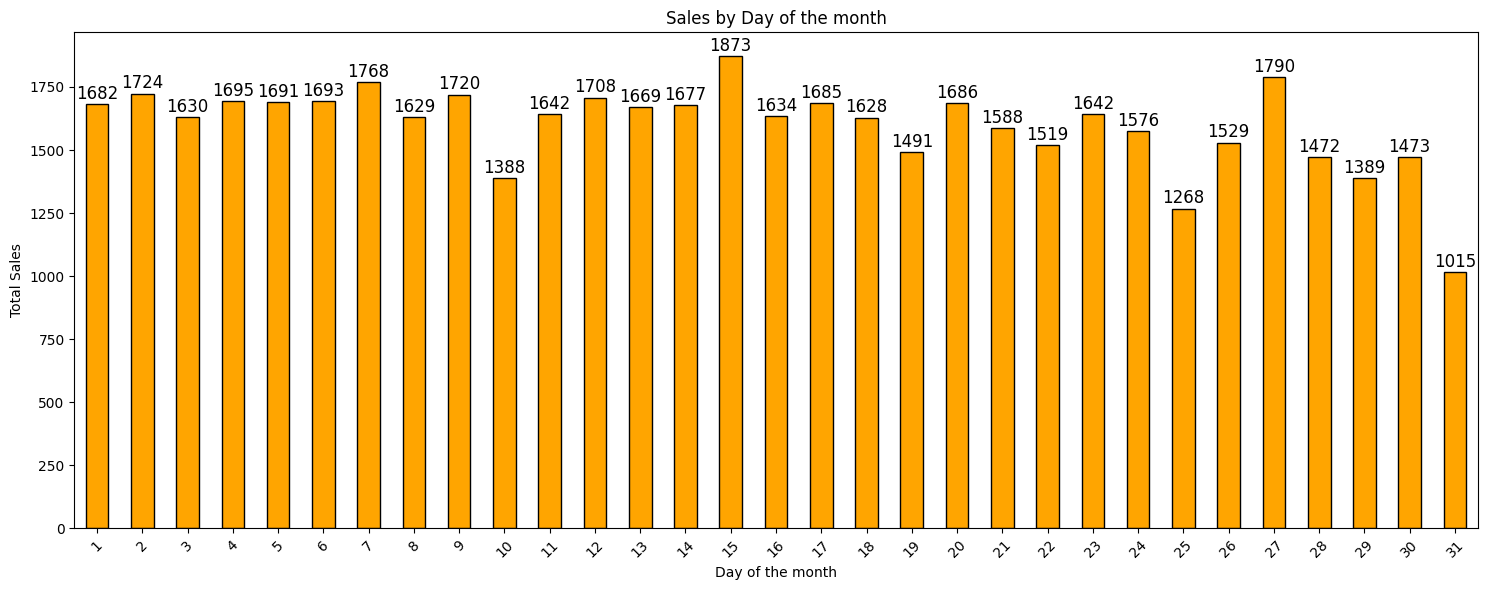

In [31]:
sales_by_day = df.groupby('Day')['quantity'].sum()



# Plotting the sales against days of the week
plt.figure(figsize=(15, 6))
ax=sales_by_day.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Sales by Day of the month')
plt.xlabel('Day of the month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
for i, v in enumerate(sales_by_day):
  ax.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

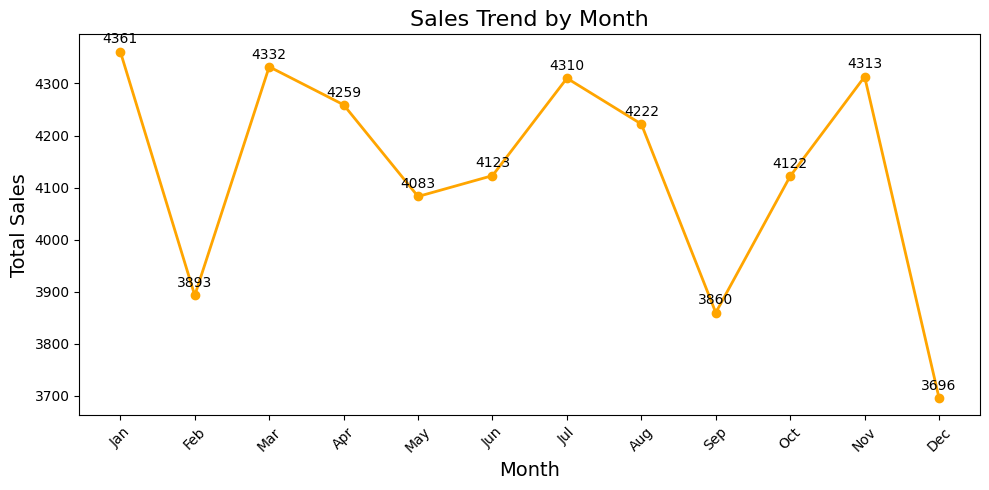

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by month and sum sales/quantity
monthly_sales = df.groupby('Month')['quantity'].sum()

# Plotting as a line plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='orange', linestyle='-', linewidth=2)
plt.title('Sales Trend by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(monthly_sales.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
for i, v in enumerate(monthly_sales.values):
    plt.text(monthly_sales.index[i], v + 10, str(v), ha='center', va='bottom', fontsize=10)
plt.show()




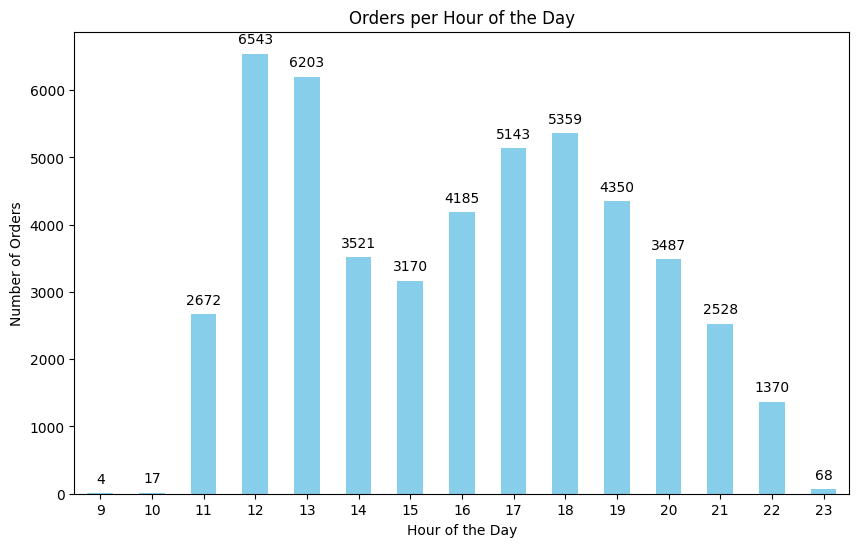

The peak hour of sales is 12:00 with 6543 orders.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by hour of the day and count the number of orders
orders_per_hour = df['Hour'].value_counts().sort_index()

# Plot the distribution of orders by hour
plt.figure(figsize=(10,6))
bars=orders_per_hour.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height}', 
                  xy=(bar.get_x() + bar.get_width() / 2, height), 
                  xytext=(0, 5),  # vertical offset
                  textcoords='offset points', 
                  ha='center', va='bottom')
plt.title('Orders per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


# Identify peak hours
peak_hour = orders_per_hour.idxmax()
peak_orders = orders_per_hour.max()

print(f"The peak hour of sales is {peak_hour}:00 with {peak_orders} orders.")


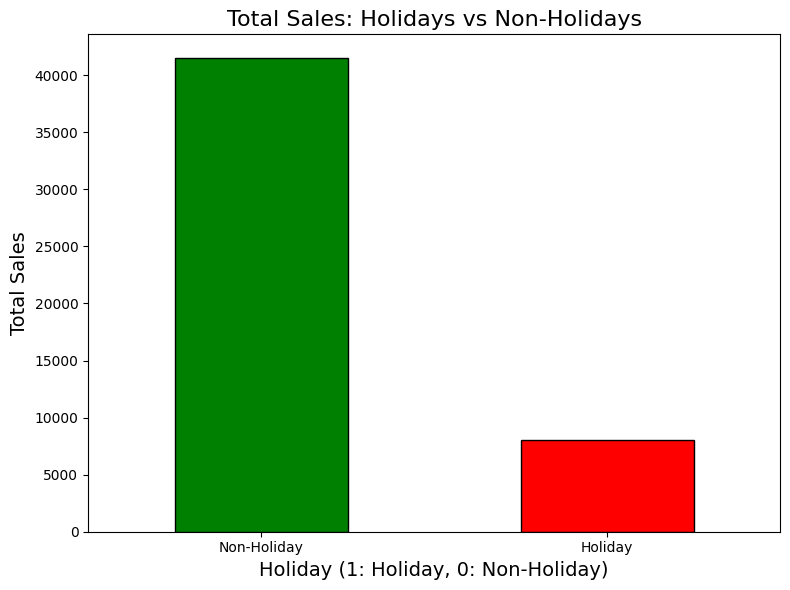

In [33]:
sales_by_holiday = df.groupby('holiday')['quantity'].sum()

# Plotting
plt.figure(figsize=(8, 6))
sales_by_holiday.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Total Sales: Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Holiday (1: Holiday, 0: Non-Holiday)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.tight_layout()
plt.show()

In [34]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')  # Convert to datetime
df.set_index('order_date', inplace=True)  # Set 'order_date' as the index

# Group by 'order_date' and sum the 'quantity'
daily_sales = df.groupby('order_date')['quantity'].sum()

# Display the result
print(daily_sales)

order_date
2015-01-01    162
2015-01-02    191
2015-01-03     99
2015-01-04    135
2015-01-05    154
             ... 
2015-12-27     89
2015-12-28    102
2015-12-29     80
2015-12-30     82
2015-12-31    178
Name: quantity, Length: 358, dtype: int64


1)ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


#spliting into training and testing data
size=int(len(daily_sales)*0.8)
train,test=daily_sales[0:size],daily_sales[size:len(daily_sales)]



ARIMA(0, 0, 0) - MAPE: 0.1663
ARIMA(0, 0, 1) - MAPE: 0.1663
ARIMA(0, 0, 2) - MAPE: 0.1662
ARIMA(0, 0, 3) - MAPE: 0.1635
ARIMA(0, 0, 4) - MAPE: 0.1624
ARIMA(0, 0, 5) - MAPE: 0.1688
ARIMA(0, 1, 0) - MAPE: 0.1696
ARIMA(0, 1, 1) - MAPE: 0.1663
ARIMA(0, 1, 2) - MAPE: 0.1663
ARIMA(0, 1, 3) - MAPE: 0.1662
ARIMA(0, 1, 4) - MAPE: 0.1636
ARIMA(0, 1, 5) - MAPE: 0.1625
ARIMA(0, 2, 0) - MAPE: 3.6577
ARIMA(0, 2, 1) - MAPE: 0.1599
ARIMA(0, 2, 2) - MAPE: 0.1673
ARIMA(0, 2, 3) - MAPE: 0.1674
ARIMA(0, 2, 4) - MAPE: 0.1671
ARIMA(0, 2, 5) - MAPE: 0.1637
ARIMA(1, 0, 0) - MAPE: 0.1663
ARIMA(1, 0, 1) - MAPE: 0.1654
ARIMA(1, 0, 2) - MAPE: 0.1657
ARIMA(1, 0, 3) - MAPE: 0.1623
ARIMA(1, 0, 4) - MAPE: 0.1622
ARIMA(1, 0, 5) - MAPE: 0.1706
ARIMA(1, 1, 0) - MAPE: 0.1818
ARIMA(1, 1, 1) - MAPE: 0.1663
ARIMA(1, 1, 2) - MAPE: 0.1680
ARIMA(1, 1, 3) - MAPE: 0.1660
ARIMA(1, 1, 4) - MAPE: 0.1680
ARIMA(1, 1, 5) - MAPE: 0.1658
ARIMA(1, 2, 0) - MAPE: 14.3951
ARIMA(1, 2, 1) - MAPE: 0.1718
ARIMA(1, 2, 2) - MAPE: 0.1673
ARIMA(1, 

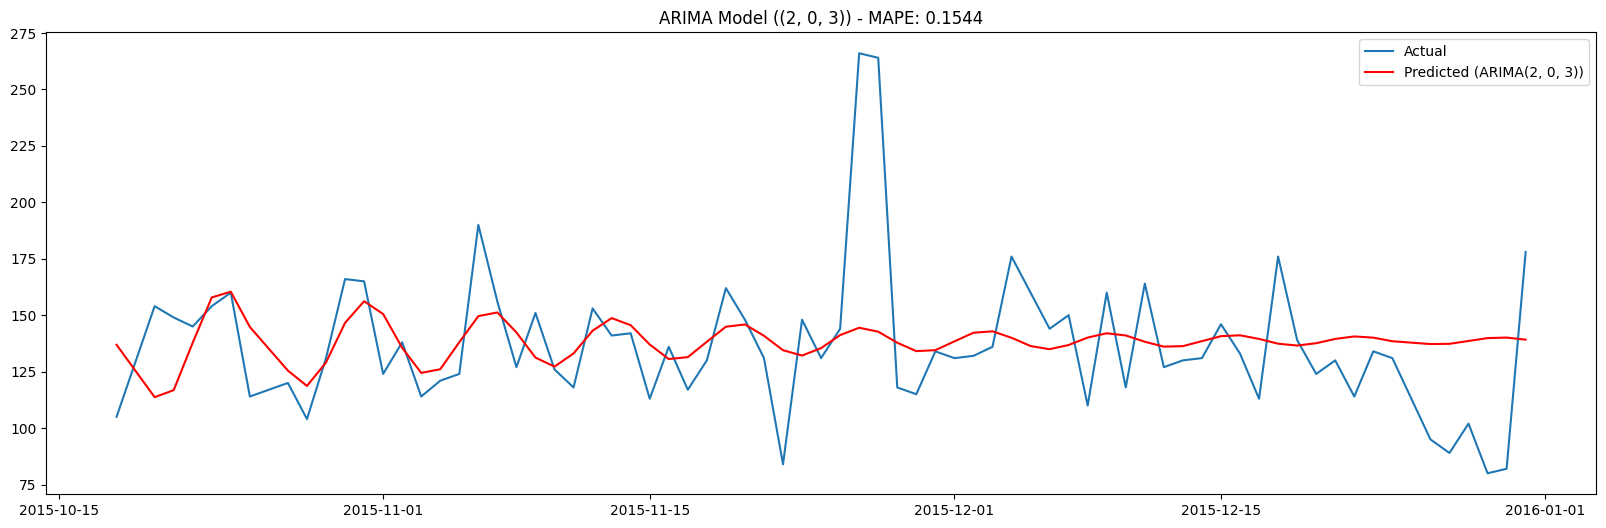

In [ ]:
#finding the best parameters
def tune_arima_model(train, test, p_values, d_values, q_values):
    best_mape, best_params = float("inf"), None
    best_model = None
    
    # Iterate through all combinations of p, d, q
    for p in p_values:
        for d in d_values:
            for q in q_values:
                # Fit ARIMA model
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                
                # Generate forecast on the test set
                forecast = model_fit.forecast(steps=len(test))
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(test, forecast)
                
                # Update the best model if this one has a lower MAPE
                if mape < best_mape:
                    best_mape = mape
                    best_params = (p, d, q)
                    best_model = model_fit
                
                print(f"ARIMA({p}, {d}, {q}) - MAPE: {mape:.4f}")

    print(f"\nBest ARIMA Model: ARIMA{best_params} - MAPE: {best_mape:.4f}")
    return best_model, best_params, best_mape



# Define possible values for p, d, q
p_values = range(0, 6)  # p: AR term
d_values = range(0, 3)  # d: differencing term
q_values = range(0, 6)  # q: MA term

# Tune the ARIMA model
best_model, best_params, best_mape = tune_arima_model(train, test, p_values, d_values, q_values)

# Plot the predictions of the best model
forecast = best_model.forecast(steps=len(test))
plt.figure(figsize=(20, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label=f'Predicted (ARIMA{best_params})', color='red')
plt.legend()
plt.title(f"ARIMA Model ({best_params}) - MAPE: {best_mape:.4f}")
plt.show()

   

In [85]:
pizza_df=df.groupby('order_date')['quantity'].sum().reset_index()
pizza_df

,order_date,quantity
0,1-1-2015,162
1,1-10-2015,194
2,1-11-2015,124
3,1-12-2015,131
4,1-2-2015,191
...,...,...
353,9-5-2015,144
354,9-6-2015,147
355,9-7-2015,135
356,9-8-2015,126


2)Prophet Model

In [ ]:
#creating a df with two columns with ds and y for training prophet model
pizza_df['order_date'] = pd.to_datetime(pizza_df['order_date'],format='%d-%m-%Y').dt.strftime('%Y-%m-%d')
pizza_df.columns = ['ds', 'y']
pizza_df
